# ARUNACHAL PARDESH

In [46]:
import pandas as pd

# Load the datasets
df_enrolment_ap = pd.read_csv('/content/Arunachal pradesh Enrolment Dataset.csv')
df_demographic_ap = pd.read_csv('/content/Arunachal pradesh Demographic Dataset.csv')
df_biometric_ap = pd.read_csv('/content/Arunachal pradesh Biometric Dataset.csv')

print("Arunachal Pradesh Enrolment Dataset:")
print(df_enrolment_ap.head())
print(df_enrolment_ap.info())
print(df_enrolment_ap.describe())

print("\nArunachal Pradesh Demographic Dataset:")
print(df_demographic_ap.head())
print(df_demographic_ap.info())
print(df_demographic_ap.describe())

print("\nArunachal Pradesh Biometric Dataset:")
print(df_biometric_ap.head())
print(df_biometric_ap.info())
print(df_biometric_ap.describe())

Arunachal Pradesh Enrolment Dataset:
         date              state     district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Arunachal Pradesh    Changlang   792120        1         0   
1  01-09-2025  Arunachal Pradesh    Changlang   792122        4         0   
2  01-09-2025  Arunachal Pradesh  East Kameng   790102        2         1   
3  01-09-2025  Arunachal Pradesh       Tawang   790104        0         1   
4  01-09-2025  Arunachal Pradesh       Tawang   790105        2         0   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1965 non-null   object
 1   state           1965 non-null   object
 2   district        1965 non-null   object
 3   pincode         1965 non-null   int64 
 4   age_0

In [47]:
df_enrolment_ap['date'] = pd.to_datetime(df_enrolment_ap['date'], format='%d-%m-%Y')
df_demographic_ap['date'] = pd.to_datetime(df_demographic_ap['date'], format='%d-%m-%Y')
df_biometric_ap['date'] = pd.to_datetime(df_biometric_ap['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment_ap:")
print(df_enrolment_ap.info())
print("\nData types after conversion for df_demographic_ap:")
print(df_demographic_ap.info())
print("\nData types after conversion for df_biometric_ap:")
print(df_biometric_ap.info())

Data types after conversion for df_enrolment_ap:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1965 non-null   datetime64[ns]
 1   state           1965 non-null   object        
 2   district        1965 non-null   object        
 3   pincode         1965 non-null   int64         
 4   age_0_5         1965 non-null   int64         
 5   age_5_17        1965 non-null   int64         
 6   age_18_greater  1965 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 107.6+ KB
None

Data types after conversion for df_demographic_ap:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5151 non-null   datet

In [48]:
merged_df_temp_ap = pd.merge(df_enrolment_ap, df_demographic_ap, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged_ap = pd.merge(merged_df_temp_ap, df_biometric_ap, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols_ap = df_merged_ap.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_merged_ap[numeric_cols_ap] = df_merged_ap[numeric_cols_ap].fillna(0)

print("Merged DataFrame (df_merged_ap) head:")
print(df_merged_ap.head())
print("\nMerged DataFrame (df_merged_ap) info:")
print(df_merged_ap.info())

Merged DataFrame (df_merged_ap) head:
        date              state   district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Arunachal Pradesh      Anjaw   792104      0.0       0.0   
1 2025-03-01  Arunachal Pradesh  Changlang   792055      0.0       0.0   
2 2025-03-01  Arunachal Pradesh  Changlang   792056      0.0       0.0   
3 2025-03-01  Arunachal Pradesh  Changlang   792103      0.0       0.0   
4 2025-03-01  Arunachal Pradesh  Changlang   792120      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           12.0         105.0          55.0         79.0  
1             0.0            0.0           0.0          26.0         10.0  
2             0.0           12.0         201.0          51.0         50.0  
3             0.0           13.0         305.0          70.0         87.0  
4             0.0           20.0         138.0         128.0         73.0  

Merged DataFrame (df_merged_ap) info:
<class 'pandas.core.fr

In [49]:
df_merged_ap['year'] = df_merged_ap['date'].dt.year
df_merged_ap['month'] = df_merged_ap['date'].dt.month

age_columns_ap = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_ap_agg = df_merged_ap.groupby(['year', 'month', 'state', 'district'])[age_columns_ap].sum().reset_index()

print("Aggregated DataFrame (df_ap_agg) head:")
print(df_ap_agg.head())
print("\nAggregated DataFrame (df_ap_agg) info:")
print(df_ap_agg.info())

Aggregated DataFrame (df_ap_agg) head:
   year  month              state       district  age_0_5  age_5_17  \
0  2025      3  Arunachal Pradesh          Anjaw      0.0       0.0   
1  2025      3  Arunachal Pradesh      Changlang      0.0       0.0   
2  2025      3  Arunachal Pradesh  Dibang Valley      0.0       0.0   
3  2025      3  Arunachal Pradesh    East Kameng      0.0       0.0   
4  2025      3  Arunachal Pradesh     East Siang      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           12.0         105.0          55.0         79.0  
1             0.0           61.0         919.0         483.0        339.0  
2             0.0            0.0           0.0          15.0         41.0  
3             0.0           48.0         465.0         189.0        244.0  
4             0.0           64.0         597.0         134.0        131.0  

Aggregated DataFrame (df_ap_agg) info:
<class 'pandas.core.frame.DataFrame'>


In [50]:
import numpy as np

# 1. Create 'totalenrolments' column
df_ap_agg['totalenrolments'] = df_ap_agg['age_0_5'] + df_ap_agg['age_5_17'] + df_ap_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_ap_agg['childenrolments'] = df_ap_agg['age_0_5'] + df_ap_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_ap_agg['totaldemoupdates'] = df_ap_agg['demo_age_5_17'] + df_ap_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_ap_agg['totalbioupdates'] = df_ap_agg['bio_age_5_17'] + df_ap_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_ap_agg['CES'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['childenrolments'] / df_ap_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_ap_agg['DUR'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['totaldemoupdates'] / df_ap_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_ap_agg['BUR'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['totalbioupdates'] / df_ap_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_ap_agg) with new metrics head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with new metrics head:
   year  month              state       district  age_0_5  age_5_17  \
0  2025      3  Arunachal Pradesh          Anjaw      0.0       0.0   
1  2025      3  Arunachal Pradesh      Changlang      0.0       0.0   
2  2025      3  Arunachal Pradesh  Dibang Valley      0.0       0.0   
3  2025      3  Arunachal Pradesh    East Kameng      0.0       0.0   
4  2025      3  Arunachal Pradesh     East Siang      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           12.0         105.0          55.0         79.0   
1             0.0           61.0         919.0         483.0        339.0   
2             0.0            0.0           0.0          15.0         41.0   
3             0.0           48.0         465.0         189.0        244.0   
4             0.0           64.0         597.0         134.0        131.0   

   totalenrolments  childenrolments  totaldemoupdates 

In [51]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_ap_agg['Enorm'] = df_ap_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_ap_agg['Dnorm'] = df_ap_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_ap_agg['Bnorm'] = df_ap_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_ap_agg['stdnorm'] = (df_ap_agg['Enorm'] + df_ap_agg['Dnorm'] + df_ap_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_ap_agg['ALBI'] = 1 - df_ap_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_ap_agg['ALBI'] = df_ap_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_ap_agg) with normalized metrics and ALBI head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with normalized metrics and ALBI head:
   year  month              state       district  age_0_5  age_5_17  \
0  2025      3  Arunachal Pradesh          Anjaw      0.0       0.0   
1  2025      3  Arunachal Pradesh      Changlang      0.0       0.0   
2  2025      3  Arunachal Pradesh  Dibang Valley      0.0       0.0   
3  2025      3  Arunachal Pradesh    East Kameng      0.0       0.0   
4  2025      3  Arunachal Pradesh     East Siang      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0             0.0           12.0         105.0          55.0  ...   
1             0.0           61.0         919.0         483.0  ...   
2             0.0            0.0           0.0          15.0  ...   
3             0.0           48.0         465.0         189.0  ...   
4             0.0           64.0         597.0         134.0  ...   

   totaldemoupdates  totalbioupdates  CES  DUR  BUR  Enorm     Dnorm  \
0             

In [52]:
df_ap_agg['Enormrisk'] = 1 - df_ap_agg['Enorm']
df_ap_agg['CESrisknorm'] = 1 - df_ap_agg['CES']
df_ap_agg['DURrisknorm'] = 1 - df_ap_agg['DUR']
df_ap_agg['BURrisknorm'] = 1 - df_ap_agg['BUR']
df_ap_agg['ALBIrisknorm'] = 1 - df_ap_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_ap_agg['riskscore'] = (
    df_ap_agg['Enormrisk'] +
    df_ap_agg['CESrisknorm'] +
    df_ap_agg['DURrisknorm'] +
    df_ap_agg['BURrisknorm'] +
    df_ap_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_ap_agg) with risk components and riskscore head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with risk components and riskscore head:
   year  month              state       district  age_0_5  age_5_17  \
0  2025      3  Arunachal Pradesh          Anjaw      0.0       0.0   
1  2025      3  Arunachal Pradesh      Changlang      0.0       0.0   
2  2025      3  Arunachal Pradesh  Dibang Valley      0.0       0.0   
3  2025      3  Arunachal Pradesh    East Kameng      0.0       0.0   
4  2025      3  Arunachal Pradesh     East Siang      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0             0.0           12.0         105.0          55.0  ...  0.053013   
1             0.0           61.0         919.0         483.0  ...  0.444042   
2             0.0            0.0           0.0          15.0  ...  0.000000   
3             0.0           48.0         465.0         189.0  ...  0.232442   
4             0.0           64.0         597.0         134.0  ...  0.299502   

      Bnorm   stdnorm   

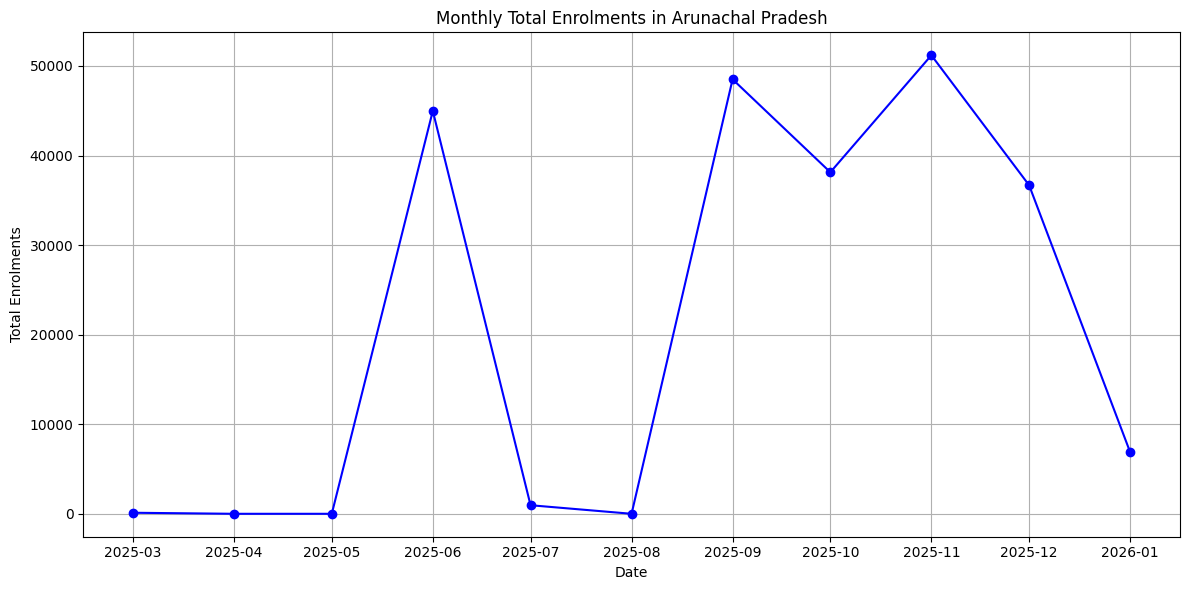

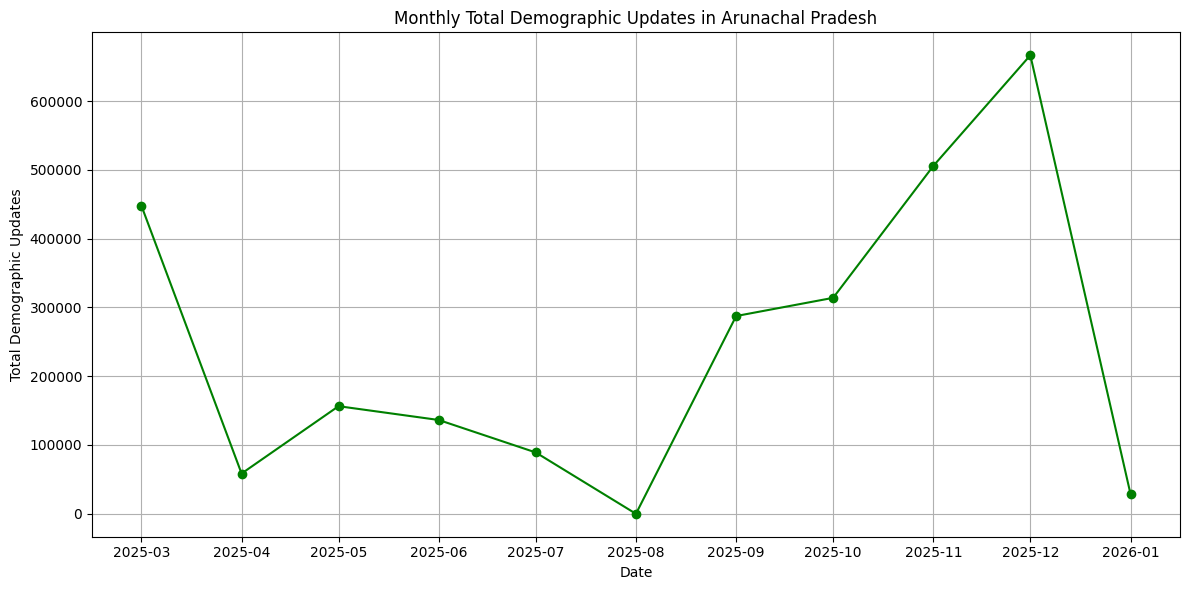

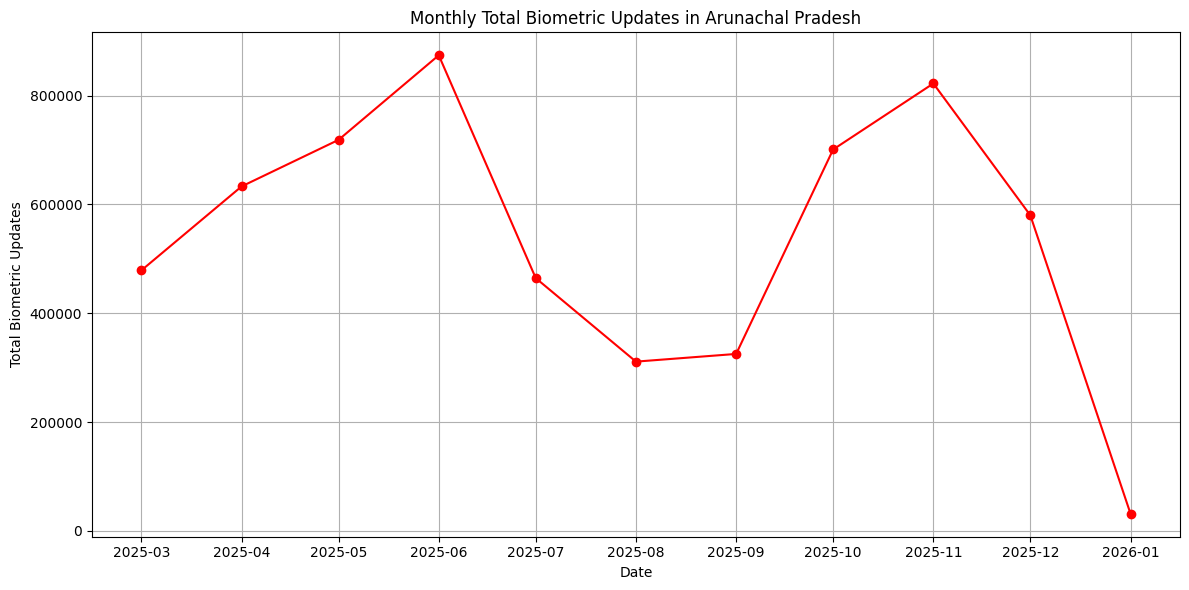

Monthly trend plots generated successfully.


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_trends = df_ap_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Arunachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Arunachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Arunachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**UNIVARIATE ANALYSIS**

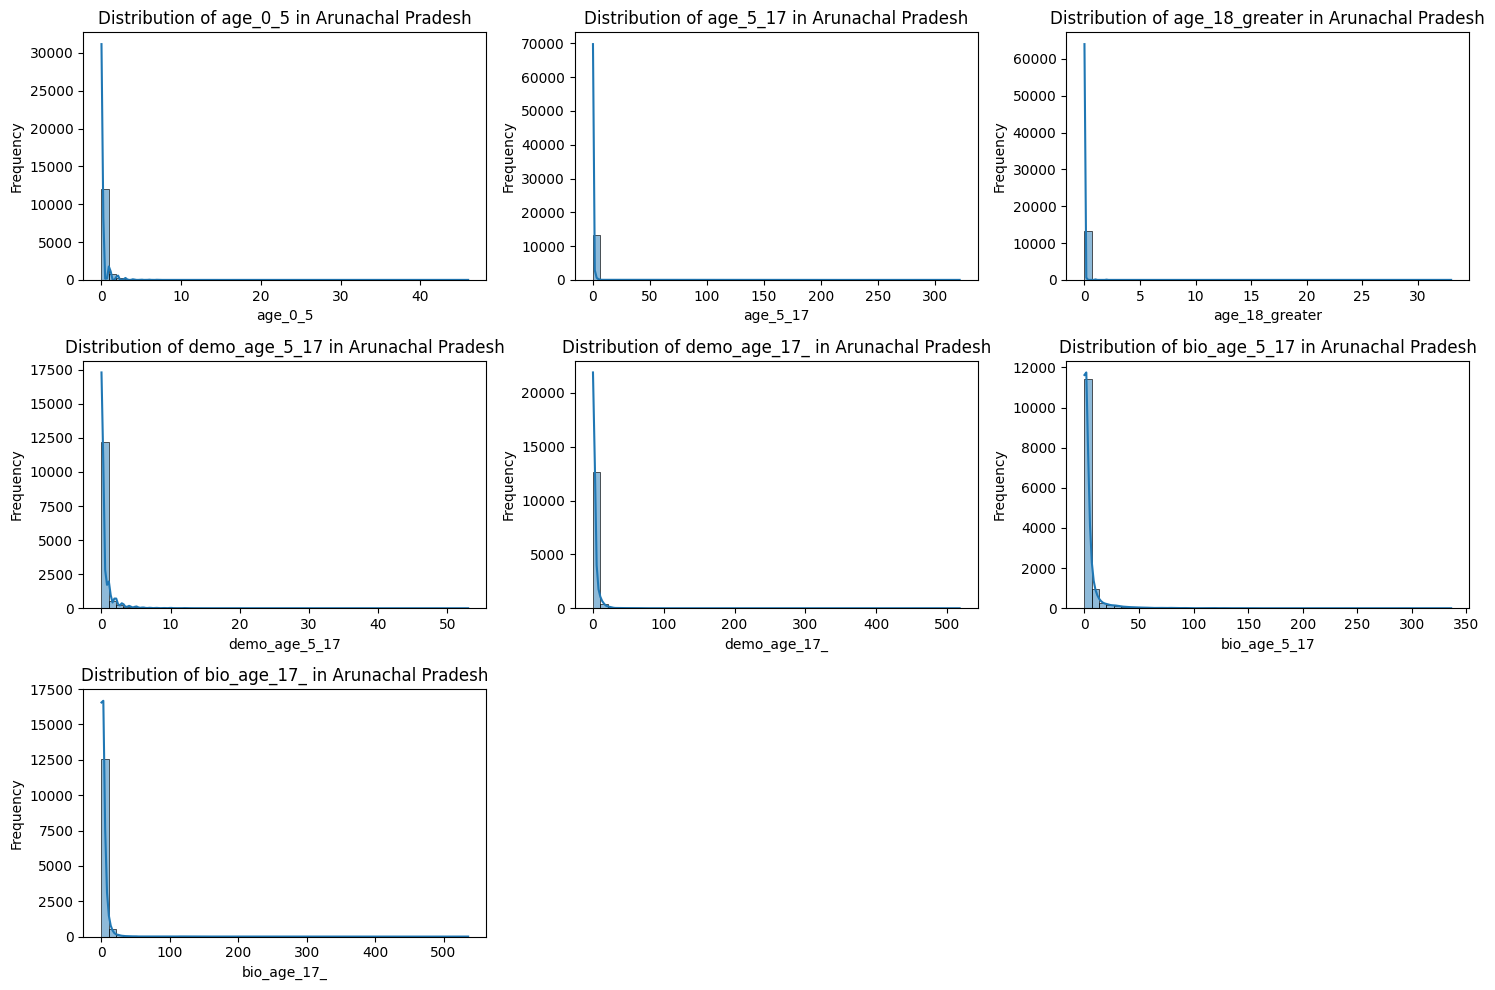

Histograms for numerical columns of df_merged_ap displayed.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_ap = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_ap):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_merged_ap[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Arunachal Pradesh')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns of df_merged_ap displayed.")

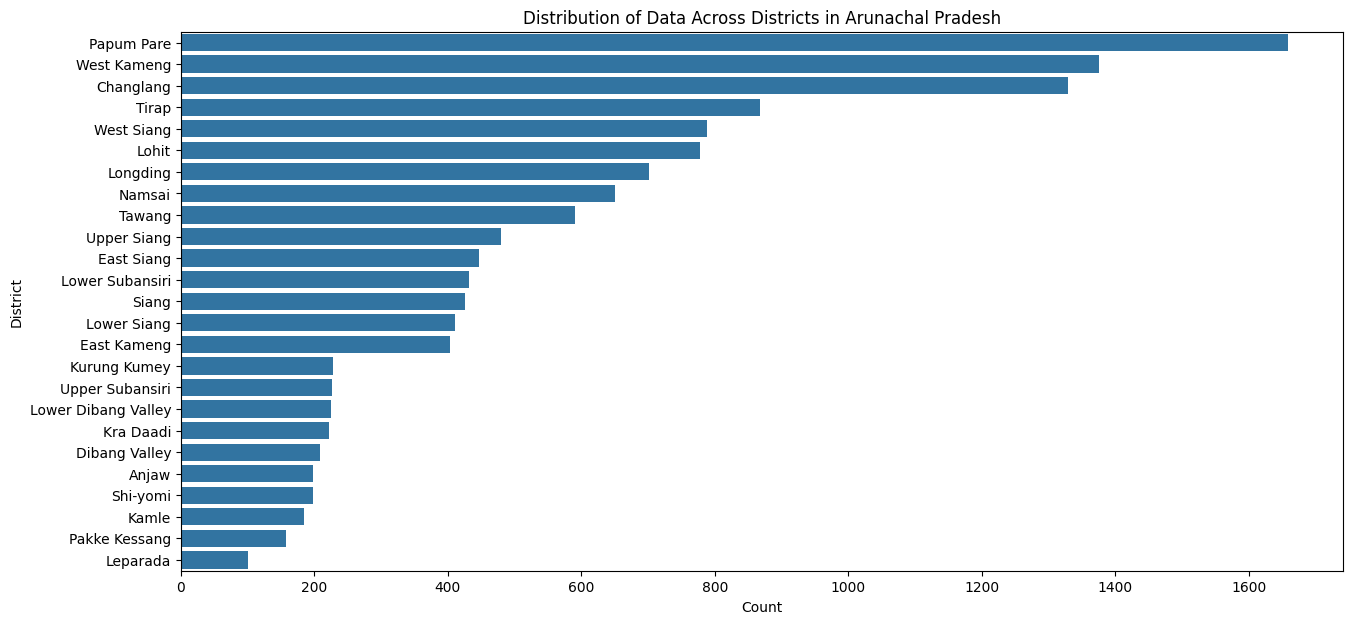

Count plot for 'district' in df_merged_ap displayed.


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.countplot(data=df_merged_ap, y='district', order=df_merged_ap['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Arunachal Pradesh')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' in df_merged_ap displayed.")

**Bivariate and Trivariate Analysis**

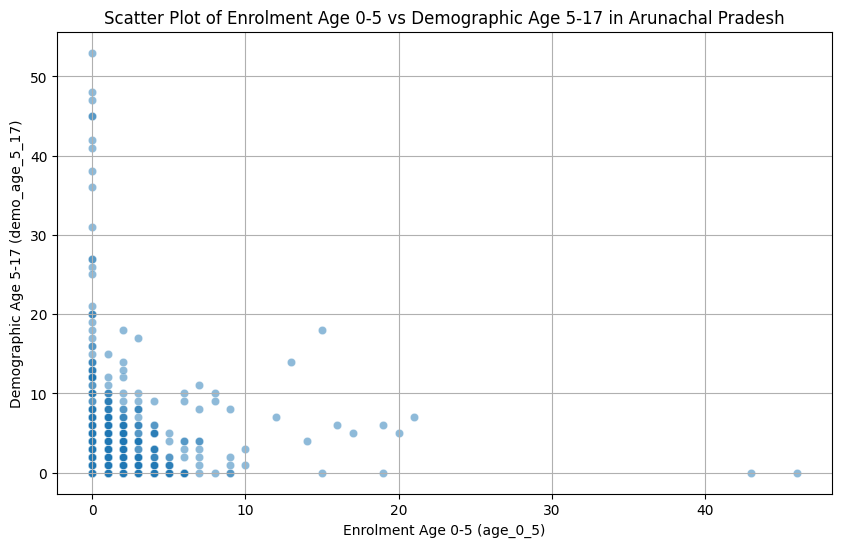

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed.


In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_ap, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Arunachal Pradesh')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed.")

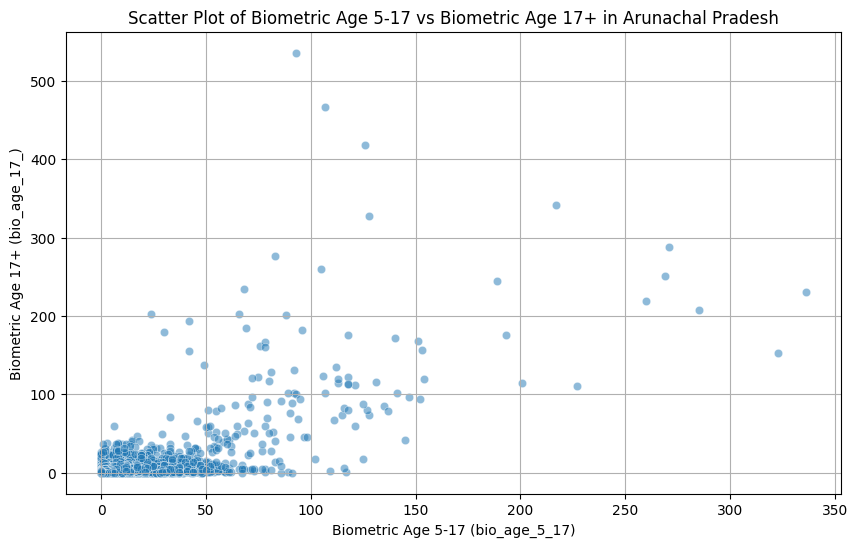

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed.


In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_ap, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Arunachal Pradesh')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed.")

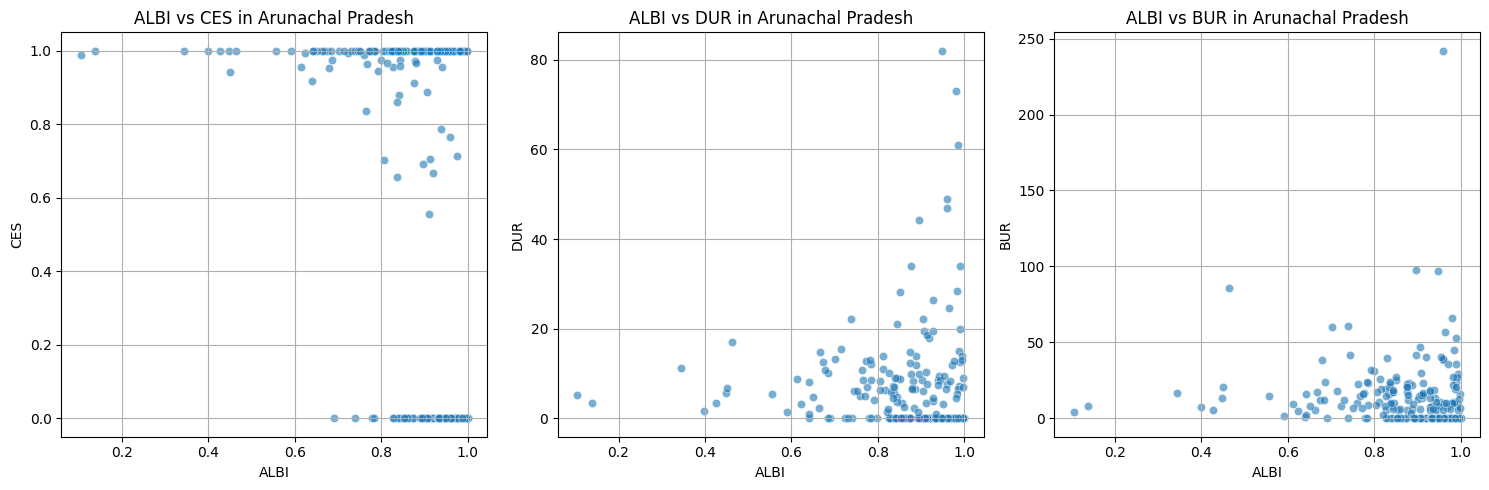

In [67]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_ap_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Arunachal Pradesh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

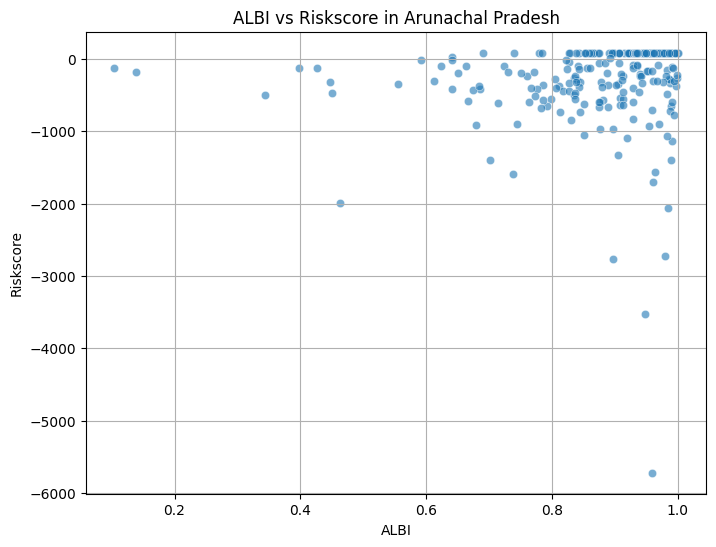

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.


In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ap_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Arunachal Pradesh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.")

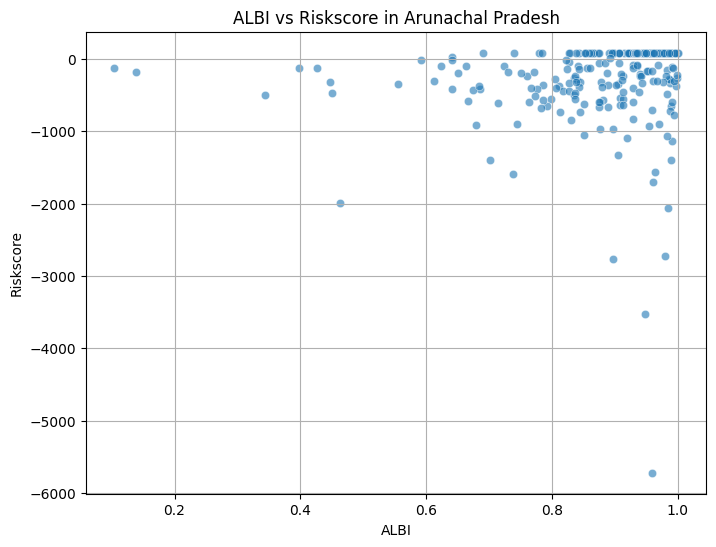

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.


In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ap_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Arunachal Pradesh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.")

Correlation Matrix for Arunachal Pradesh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.524907        0.435091       0.153272   
age_5_17        0.524907  1.000000        0.771423       0.041008   
age_18_greater  0.435091  0.771423        1.000000       0.004636   
demo_age_5_17   0.153272  0.041008        0.004636       1.000000   
demo_age_17_    0.111271  0.023833        0.003997       0.832501   
bio_age_5_17    0.051097  0.008158        0.016311       0.301168   
bio_age_17_     0.015935  0.004982       -0.000370       0.372251   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.111271      0.051097     0.015935  
age_5_17            0.023833      0.008158     0.004982  
age_18_greater      0.003997      0.016311    -0.000370  
demo_age_5_17       0.832501      0.301168     0.372251  
demo_age_17_        1.000000      0.304016     0.433709  
bio_age_5_17        0.304016      1.000000     0.682800  

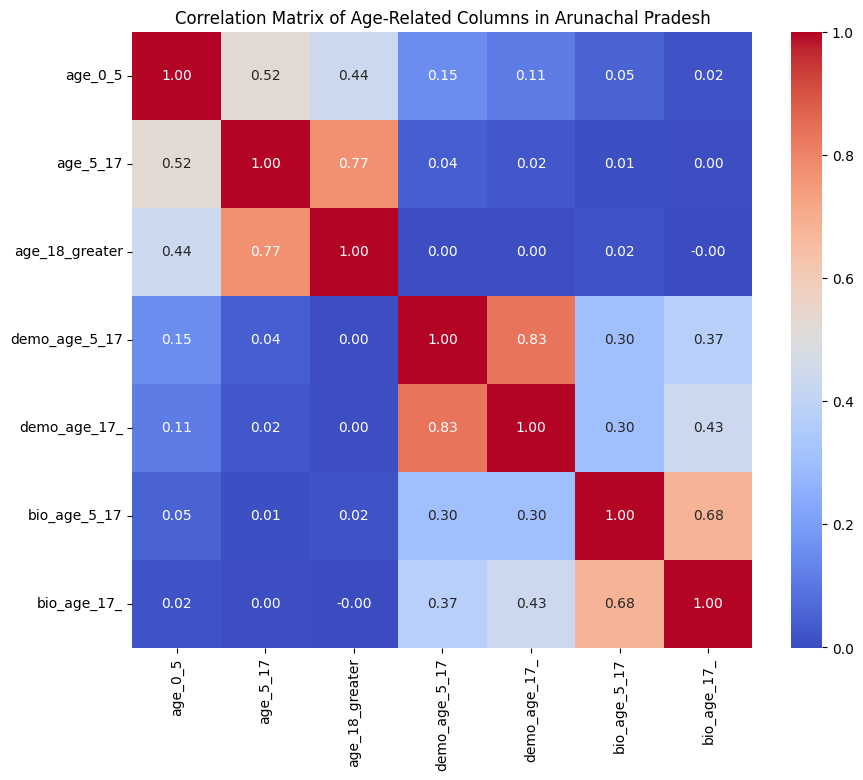

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Arunachal Pradesh, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [60]:
numerical_age_cols_ap = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_ap = df_merged_ap[numerical_age_cols_ap].corr()

print("Correlation Matrix for Arunachal Pradesh:")
print(correlation_matrix_ap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns in Arunachal Pradesh')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Arunachal Pradesh, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

District-wise average age-related data for Arunachal Pradesh:
        district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0          Anjaw  0.126263  0.146465        0.015152       0.540404   
1      Changlang  0.426637  0.285177        0.010534       0.455982   
2  Dibang Valley  0.043062  0.052632        0.000000       0.143541   
3    East Kameng  0.292804  0.339950        0.034739       0.975186   
4     East Siang  0.210762  0.304933        0.004484       0.865471   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      2.904040      4.419192     4.287879  
1      3.732129      5.077502     3.904439  
2      0.631579      1.990431     1.588517  
3      4.600496      8.200993     6.012407  
4      5.228700      5.775785     4.078475  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        25 non-null     object 
 1  

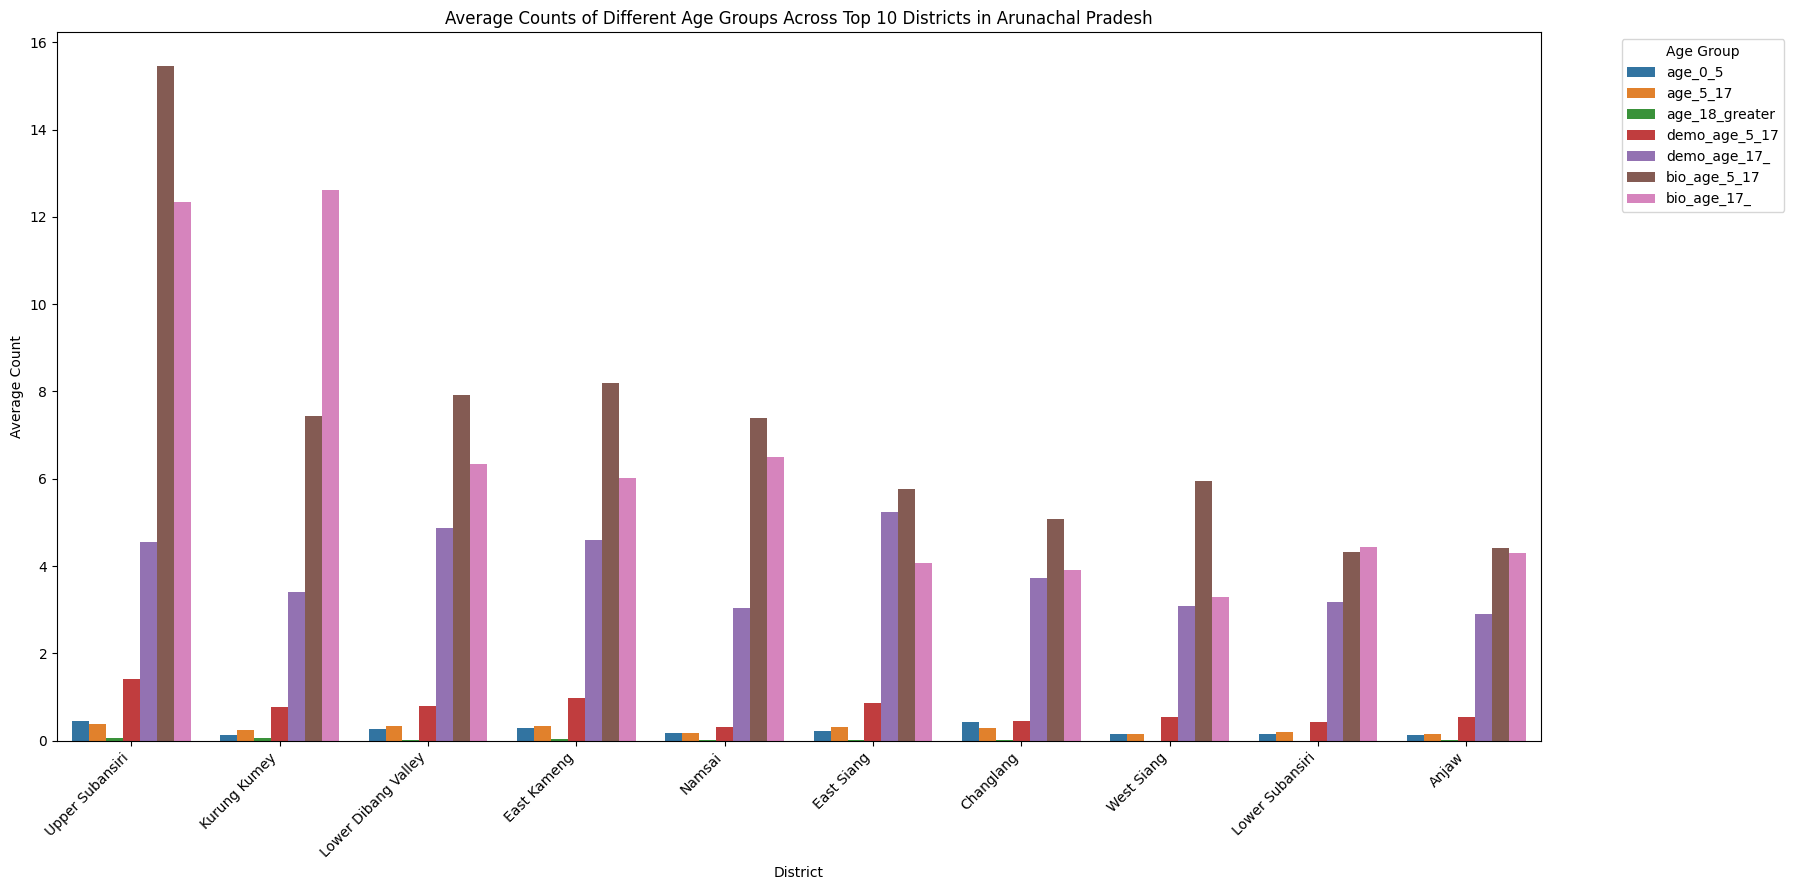

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Arunachal Pradesh, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [61]:
age_cols_to_group_ap = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean_ap = df_merged_ap.groupby('district')[age_cols_to_group_ap].mean().reset_index()

print("District-wise average age-related data for Arunachal Pradesh:")
print(df_district_mean_ap.head())
print(df_district_mean_ap.info())

df_district_mean_ap['total_avg_age'] = df_district_mean_ap[age_cols_to_group_ap].sum(axis=1)
df_district_mean_top10_ap = df_district_mean_ap.nlargest(10, 'total_avg_age')

df_district_mean_melted_ap = df_district_mean_top10_ap.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group_ap,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted_ap, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts in Arunachal Pradesh')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Arunachal Pradesh, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Arunachal Pradesh:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0          860.0        7342.0   
1 2025-04-01      0.0       0.0             0.0            0.0           0.0   
2 2025-05-01      0.0       0.0             0.0            0.0           0.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0        2953.0       4447.0  
1        4258.0       4117.0  
2        4121.0       4184.0  
3         164.0        206.0  
4         173.0        240.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null   

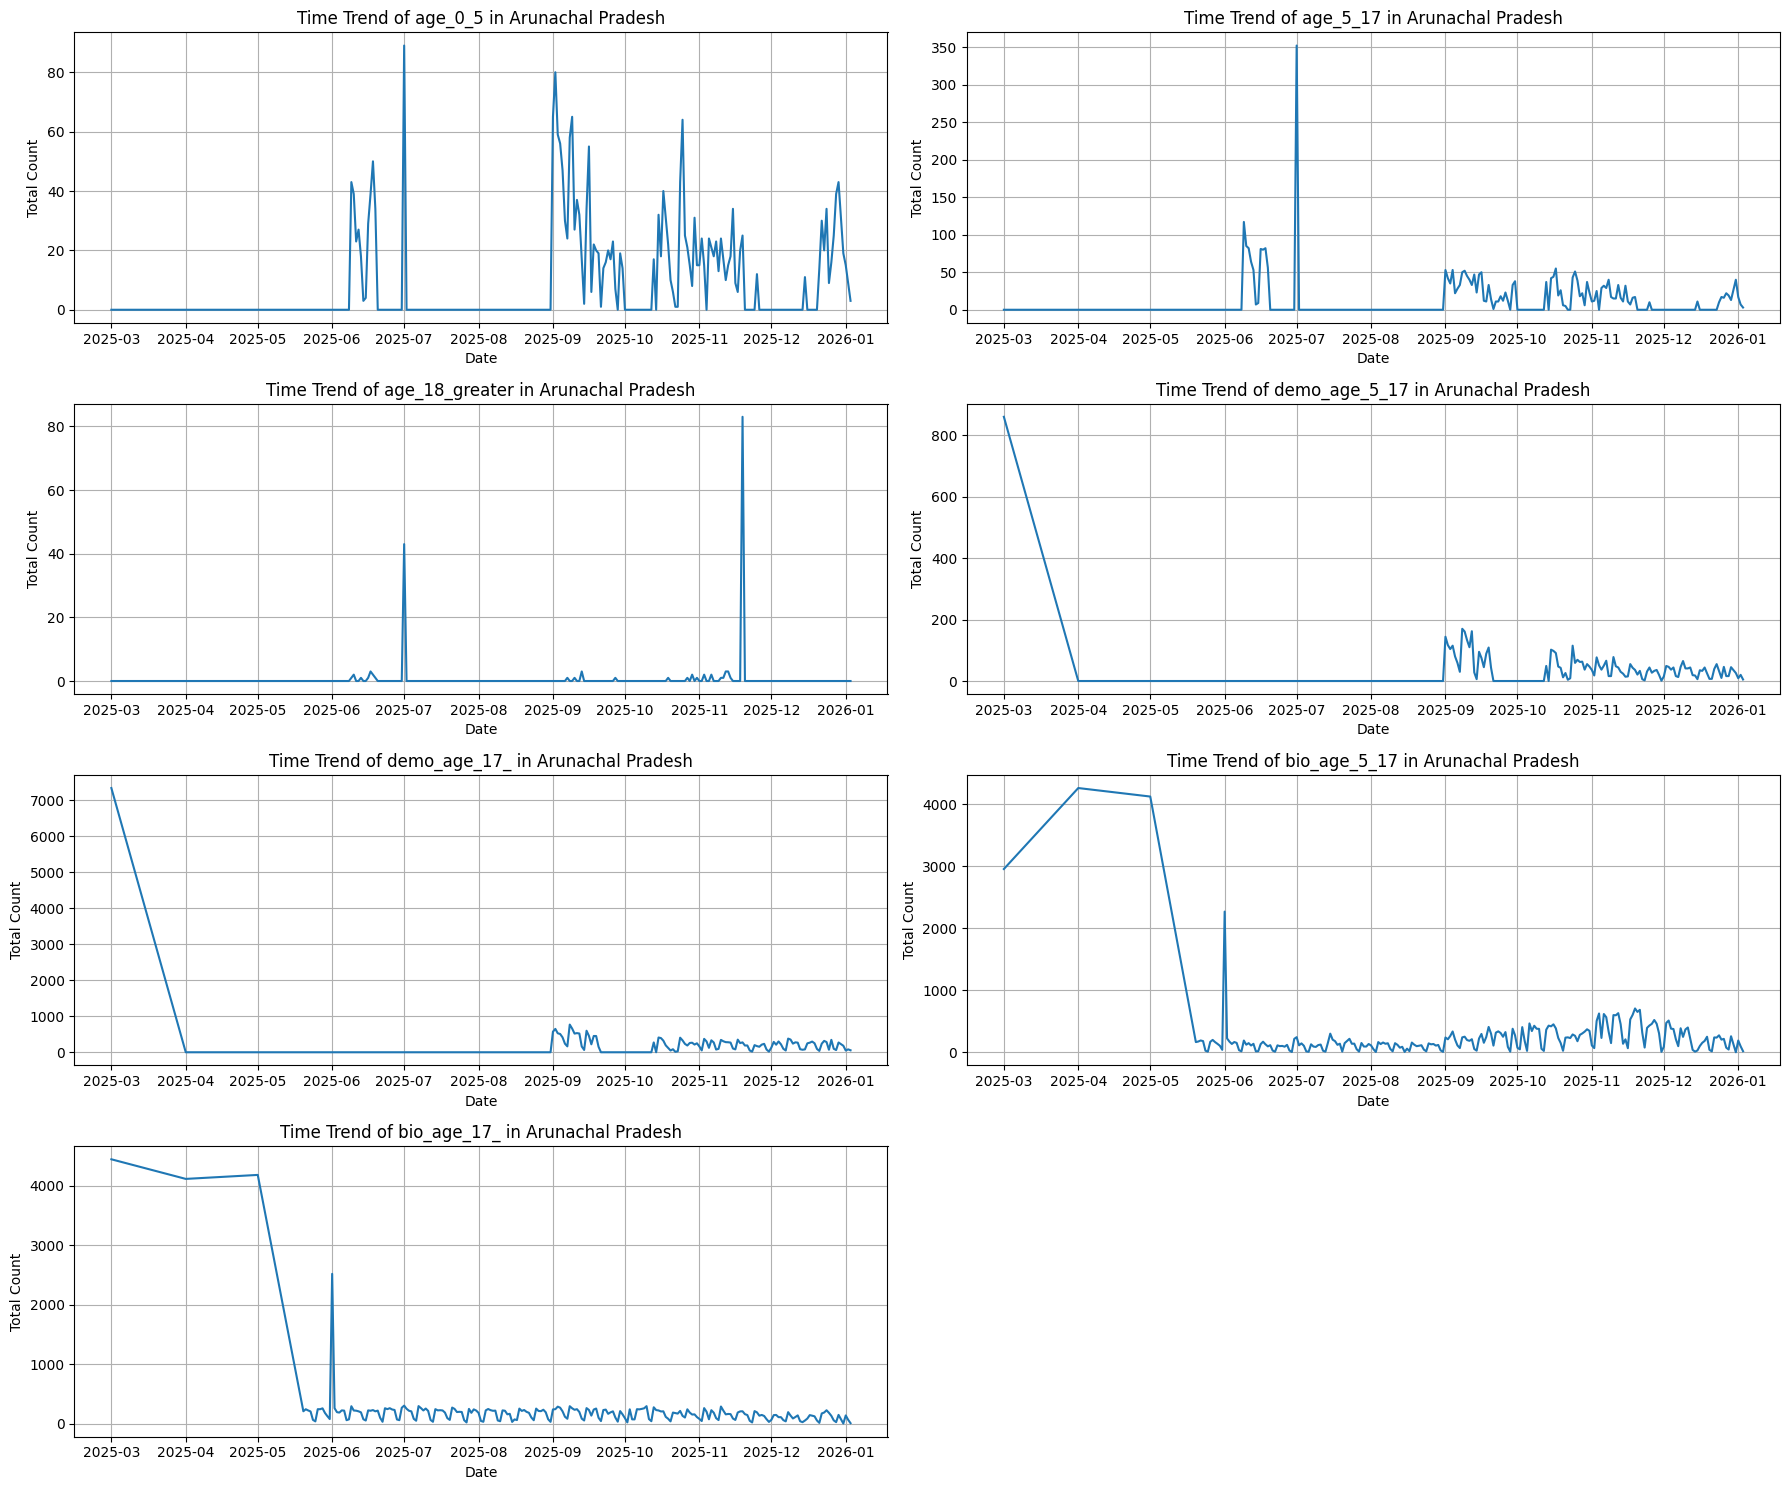

Insight: Line charts for each age-related column over time in Arunachal Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [62]:
df_time_trend_ap = df_merged_ap.groupby('date')[age_cols_to_group_ap].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Arunachal Pradesh:")
print(df_time_trend_ap.head())
print(df_time_trend_ap.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group_ap):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend_ap, x='date', y=col)
    plt.title(f'Time Trend of {col} in Arunachal Pradesh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Arunachal Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

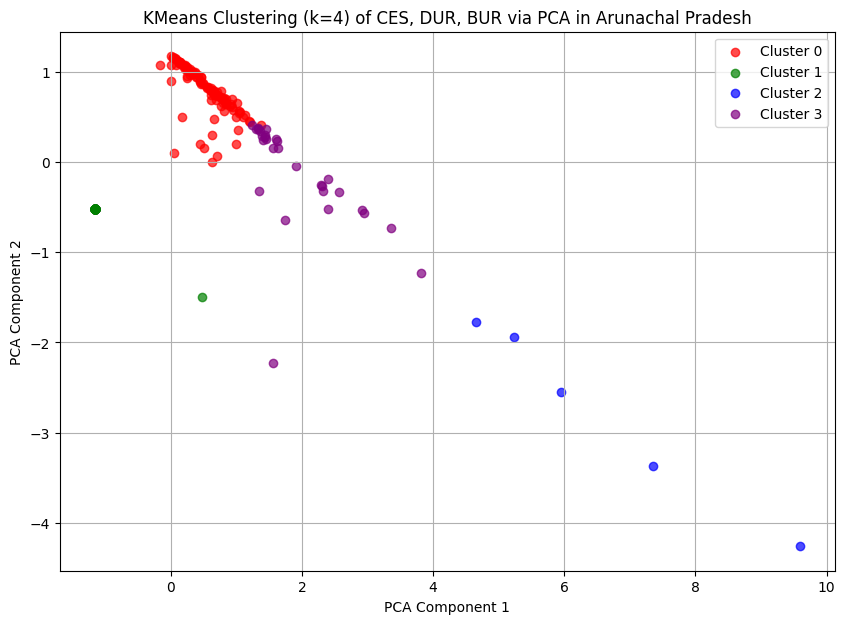

First 5 rows of df_ap_agg with 'clusterlabel' column after clustering:
   year  month              state       district  age_0_5  age_5_17  \
0  2025      3  Arunachal Pradesh          Anjaw      0.0       0.0   
1  2025      3  Arunachal Pradesh      Changlang      0.0       0.0   
2  2025      3  Arunachal Pradesh  Dibang Valley      0.0       0.0   
3  2025      3  Arunachal Pradesh    East Kameng      0.0       0.0   
4  2025      3  Arunachal Pradesh     East Siang      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0           12.0         105.0          55.0  ...  0.052675   
1             0.0           61.0         919.0         483.0  ...  0.338034   
2             0.0            0.0           0.0          15.0  ...  0.020324   
3             0.0           48.0         465.0         189.0  ...  0.176690   
4             0.0           64.0         597.0         134.0  ...  0.107010   

    stdnorm      ALBI  Enor

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering_ap = df_ap_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler_ap = StandardScaler()
scaled_features_ap = scaler_ap.fit_transform(features_for_clustering_ap)

# 3. Apply KMeans clustering
kmeans_ap = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_ap.fit(scaled_features_ap)

# 4. Add the cluster labels to df_ap_agg
df_ap_agg['clusterlabel'] = kmeans_ap.labels_

# 5. Apply PCA for dimensionality reduction
pca_ap = PCA(n_components=2, random_state=42)
pca_components_ap = pca_ap.fit_transform(scaled_features_ap)

# Create a DataFrame for PCA components for easier plotting
pca_df_ap = pd.DataFrame(data=pca_components_ap, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_ap['clusterlabel'] = df_ap_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df_ap[pca_df_ap['clusterlabel'] == i]['PCA Component 1'],
        pca_df_ap[pca_df_ap['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA in Arunachal Pradesh')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_ap_agg with 'clusterlabel' column after clustering:")
print(df_ap_agg.head())

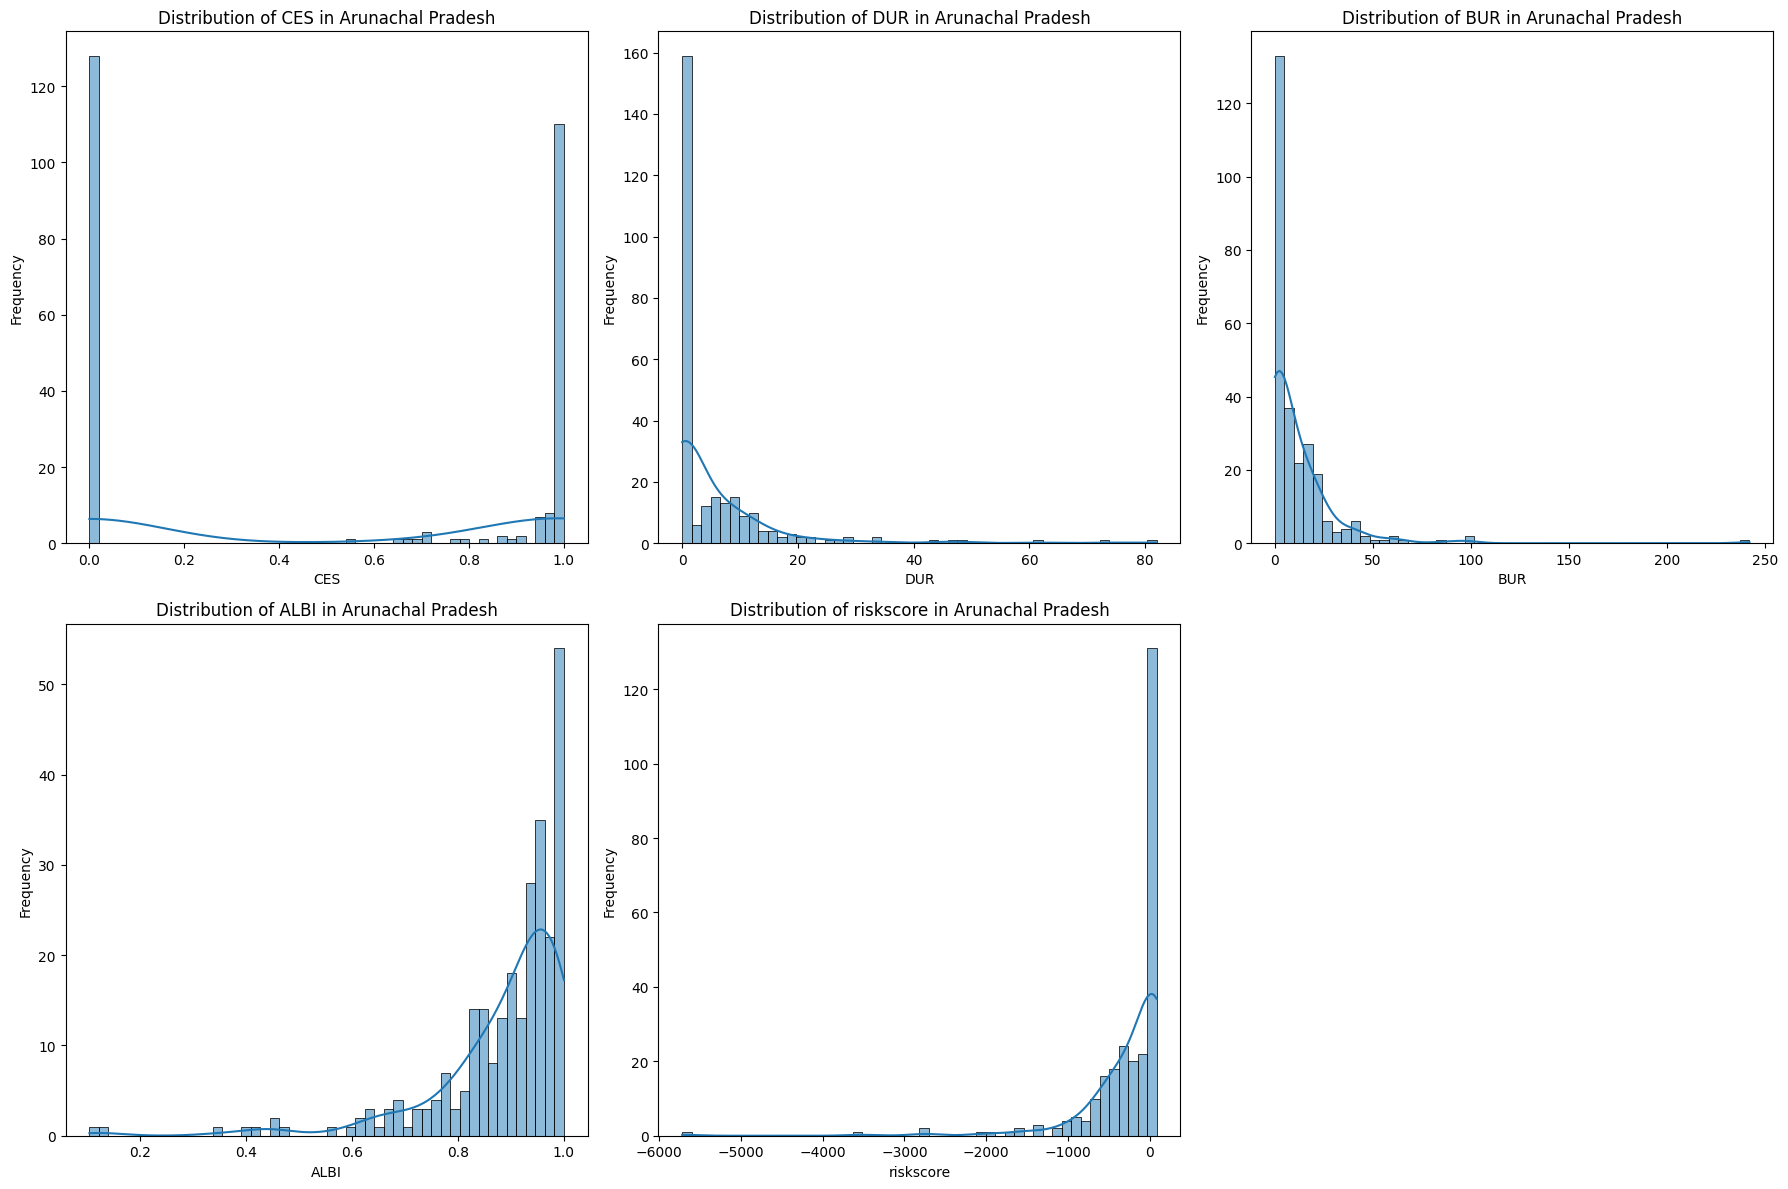

Histograms for CES, DUR, BUR, ALBI, and riskscore in Arunachal Pradesh displayed.


In [64]:
metrics_to_plot_ap = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot_ap):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ap_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Arunachal Pradesh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Arunachal Pradesh displayed.")

In [65]:
import pandas as pd

# 1. Find the latest year and month
latest_year_ap = df_ap_agg['year'].max()
latest_month_ap = df_ap_agg[df_ap_agg['year'] == latest_year_ap]['month'].max()

print(f"Latest reporting period for Arunachal Pradesh: Year {latest_year_ap}, Month {latest_month_ap}")

# 2. Filter df_ap_agg for the latest year and month
df_latest_month_ap = df_ap_agg[(df_ap_agg['year'] == latest_year_ap) & (df_ap_agg['month'] == latest_month_ap)].copy()

# Metrics to analyze
metrics_ap = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_ap:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For CES, DUR, BUR, ALBI, top 10 implies best performance, so ascending for ALBI and descending for others
    if metric == 'ALBI':
        top_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=False).head(10)
        bottom_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(top_10_ap[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(bottom_10_ap[['district', metric]].to_string(index=False))
    elif metric == 'riskscore':
        # For riskscore, 'top' means highest risk, so ascending=False
        top_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=False).head(10)
        # For riskscore, 'bottom' means lowest risk, so ascending=True
        bottom_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(top_10_ap[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(bottom_10_ap[['district', metric]].to_string(index=False))
    else: # For CES, DUR, BUR
        top_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=False).head(10)
        bottom_10_ap = df_latest_month_ap.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(top_10_ap[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_ap}, Month {latest_month_ap}):")
        print(bottom_10_ap[['district', metric]].to_string(index=False))

Latest reporting period for Arunachal Pradesh: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
       district  CES
      Changlang  1.0
  Dibang Valley  1.0
    East Kameng  1.0
     East Siang  1.0
   Kurung Kumey  1.0
      Kra Daadi  1.0
       Longding  1.0
          Lohit  1.0
     West Siang  1.0
Upper Subansiri  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
     district  CES
        Anjaw  0.0
        Kamle  0.0
Pakke Kessang  0.0
     Leparada  0.0
        Siang  0.0
  Upper Siang  0.0
     Shi-yomi  0.0
  East Kameng  1.0
 Kurung Kumey  1.0
    Kra Daadi  1.0

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
           district       DUR
        West Kameng 17.000000
         Papum Pare 11.333333
              Tirap  9.000000
             Namsai  8.000000
    Upper Subansiri  6.000000
         West Siang  6.000000
Lower Dibang Valley  5.000000
         East Siang  4.666667
          Changlang  3.500000
        

Summary (Arunachal Pradesh):
The Aadhaar lifecycle analysis for Arunachal Pradesh provides key insights into the enrolment and update activities across its districts. The df_ap_agg dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

Key Observations:
Data Integration and Preprocessing: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single df_merged_ap DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

Derived Metrics: Essential metrics such as totalenrolments, childenrolments, totaldemoupdates, and totalbioupdates were calculated. From these, CES (Child Enrolment Score), DUR (Demographic Update Rate), and BUR (Biometric Update Rate) were computed, with appropriate handling for division by zero.

Normalization and ALBI: Min-max normalization was applied to totalenrolments, totaldemoupdates, and totalbioupdates to create Enorm, Dnorm, and Bnorm. These normalized values were used to compute stdnorm and the ALBI (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

Risk Score: A riskscore was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to observations in other states, some negative risk scores were noted for some districts, highlighting a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

Monthly Trends: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating periods of varying activity levels or specific campaigns/reporting cycles.

Correlation Analysis: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (age_0_5 and age_5_17), and similarly within demographic (demo_age_5_17 and demo_age_17_) and biometric (bio_age_5_17 and bio_age_17_) update categories. Correlations between enrolment figures and update figures were generally weaker.

District Performance (Latest Reporting Period: Year 2026, Month 1):

CES (Child Enrolment Score): Most districts (Changlang, Dibang Valley, East Kameng, East Siang, Kurung Kumey, Kra Daadi, Longding, Lohit, West Siang, Upper Subansiri) achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Districts like Anjaw, Kamle, Pakke Kessang, Leparada, Siang, Upper Siang, and Shi-yomi had a CES of 0.0, indicating no child enrolments were reported for these districts in the latest month.
DUR (Demographic Update Rate): West Kameng (17.0) and Papum Pare (11.33) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Districts like Anjaw, Kamle, Pakke Kessang, Leparada, Siang, Upper Siang, and Shi-yomi had 0.0 DURs, indicating no demographic updates for the month.
BUR (Biometric Update Rate): West Kameng (86.0) and Upper Subansiri (42.0) showed the highest BUR. Districts like Anjaw, Kamle, Pakke Kessang, Leparada, Siang, Upper Siang, and Shi-yomi had 0.0 BURs, indicating no biometric updates for the month.
ALBI (Aadhaar Lifecycle Balance Index): Kamle (1.0), Pakke Kessang (0.996), and Shi-yomi (0.996) exhibited the best balance, close to 1. Changlang (0.138) and Papum Pare (0.344) had the lowest balance.
Risk Score: Upper Siang (81.02) and Anjaw (80.76) showed the highest positive risk scores. However, a significant number of districts, including West Kameng (-1991.77) and Upper Subansiri (-897.40), displayed large negative risk scores, reinforcing the need to re-evaluate this metric's calculation.
Clustering Analysis: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Arunachal Pradesh's districts.

Conclusion:
Arunachal Pradesh displays diverse performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The persistent issue with negative riskscore values across multiple states, including Arunachal Pradesh, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.